## Introducción
Este proyecto aplica un Análisis Exploratorio de Datos (EDA) a un dataset de **violencia intrafamiliar en Colombia**, reportado por la Policía Nacional. El EDA permite conocer la estructura, calidad y patrones generales en los datos, siendo esencial para estudios sociales y para generar alertas tempranas.


In [ ]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Cargar el dataset
df = pd.read_csv('Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv')

<ipython-input-39-2326596920>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv')


# Contexto del dataset

###  Características del dataset

**Origen:** Datos abiertos del portal de la Policía Naciona / [Kaggle](https://www.kaggle.com/datasets/oscardavidperilla/domestic-violence-in-colombia)

**Tamaño:** 476.970 registros.

**Variables principales:**
* Fecha del hecho
* Departamento y municipio
* Género y grupo etario
* Cantidad de casos reportados
* Armas o medios utilizados
* Código DANE geográfico

Se busca entender cómo se comporta este delito en el tiempo, por regiones y por características de las víctimas.

### Objetivos
* Identificar quiénes son las principales víctimas (por edad y género).
* Detectar departamentos y meses con mayor número de casos.
* Explorar tendencias y relaciones entre variables.

### Dimensiones y estructura del dataset

In [ ]:
# Vista general del dataset
df.shape, df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476970 non-null  object
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


((476970, 8),
 None,
    DEPARTAMENTO          MUNICIPIO CODIGO DANE                 ARMAS MEDIOS  \
 0     ATLÁNTICO  BARRANQUILLA (CT)     8001000  ARMA BLANCA / CORTOPUNZANTE   
 1        BOYACÁ            DUITAMA    15238000  ARMA BLANCA / CORTOPUNZANTE   
 2       CAQUETÁ        PUERTO RICO    18592000  ARMA BLANCA / CORTOPUNZANTE   
 3      CASANARE               MANÍ    85139000  ARMA BLANCA / CORTOPUNZANTE   
 4  CUNDINAMARCA   BOGOTÁ D.C. (CT)    11001000  ARMA BLANCA / CORTOPUNZANTE   
 
   FECHA HECHO     GENERO GRUPO ETARIO  CANTIDAD  
 0   1/01/2010  MASCULINO      ADULTOS         1  
 1   1/01/2010   FEMENINO      ADULTOS         1  
 2   1/01/2010  MASCULINO      ADULTOS         1  
 3   1/01/2010   FEMENINO      ADULTOS         1  
 4   1/01/2010   FEMENINO      ADULTOS         1  )

El dataset combina variables categóricas (como ```DEPARTAMENTO```, ```GENERO```, ```GRUPO ETARIO```) y numéricas (```CANTIDAD```, ```AÑO```), junto con una variable temporal (```FECHA HECHO```). Esta diversidad permite analizar la violencia intrafamiliar desde múltiples dimensiones: espacial, demográfica, temporal y cuantitativa.

### Valores nulos por variable

In [ ]:
#Verificar si hay nulos uplicados
df.isnull().sum()

,0
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,2
FECHA HECHO,0
GENERO,3
GRUPO ETARIO,1615
CANTIDAD,0


# Limpieza y Preparación





1. Relleno de datos faltantes y estandarización de categorías





In [ ]:
# - Manejo de valores nulos
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].fillna("NO REPORTA")
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].fillna("NO REPORTADO")
df['GENERO'] = df['GENERO'].fillna("NO REPORTA")
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].str.strip().str.upper() #Limpia los espacios
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].replace({
    'CORTANTES': 'ARMA BLANCA / CORTOPUNZANTE',
    'CORTOPUNZANTES': 'ARMA BLANCA / CORTOPUNZANTE',
    'PUNZANTES': 'ARMA BLANCA / CORTOPUNZANTE',
    '-': 'NO REPORTADO', 'NO REPORTA' : 'NO REPORTADO'
})
df['GENERO'] = df['GENERO'].replace({
    '-': 'NO REPORTA'
})

2. Conversión de fechas y creación de la variable ```AÑO```

In [ ]:
# Convertir fechas
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], errors='coerce')
df['AÑO'] = df['FECHA HECHO'].dt.year

3. Eliminación de duplicados.

In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()

4. Revisión de valores extremos en ```CANTIDAD```.

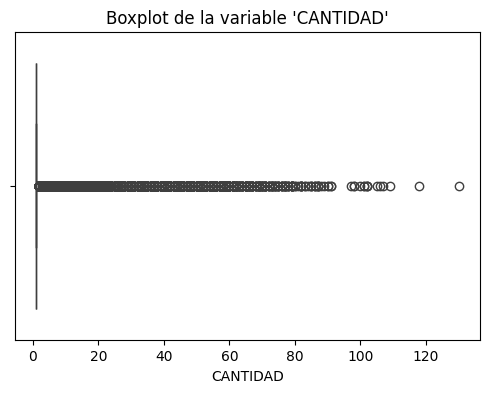

In [ ]:
# Boxplot de cantidad
plt.figure(figsize=(6, 4))
sns.boxplot(x='CANTIDAD', data=df)
plt.title("Boxplot de la variable 'CANTIDAD'")
plt.show()

La mayoría de los casos tienen valores bajos, pero hay algunos registros atípicos con cantidades altas.

# Análisis Descriptivo


###Estadísticas generales de la variable 'CANTIDAD'

In [ ]:
# Estadísticas generales
df['CANTIDAD'].describe()

,CANTIDAD
count,199226.000000
mean,1.836773
std,3.865864
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,130.000000


La mayoría de los registros tienen una cantidad cercana a 1, pero hay valores máximos considerablemente más altos, lo que indica posibles outliers.

###Histograma de la variable 'CANTIDAD'

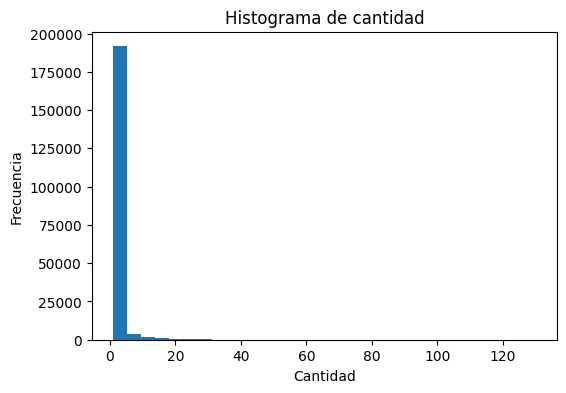

In [ ]:
# Histograma
plt.figure(figsize=(6,4))
df['CANTIDAD'].hist(bins=30)
plt.title("Histograma de cantidad")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.grid(False)
plt.show()

La distribución está fuertemente sesgada a la derecha, lo que indica que la mayoría de los casos reportados corresponden a cantidades bajas, especialmente 1.

###Distribución de cantidad por género

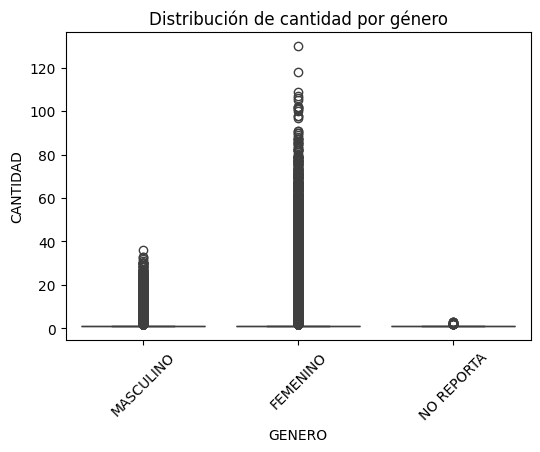

In [ ]:
# Cantidad por género
plt.figure(figsize=(6,4))
sns.boxplot(x='GENERO', y='CANTIDAD', data=df)
plt.xticks(rotation=45)
plt.title("Distribución de cantidad por género")
plt.show()

Se evidencia una mayor concentración y variabilidad de casos en el género femenino, con varios valores atípicos elevados. En comparación, los casos reportados por hombres y aquellos sin reporte de género son menores y más homogéneos.




# Visualización de datos


### Gráfica de barras por departamento

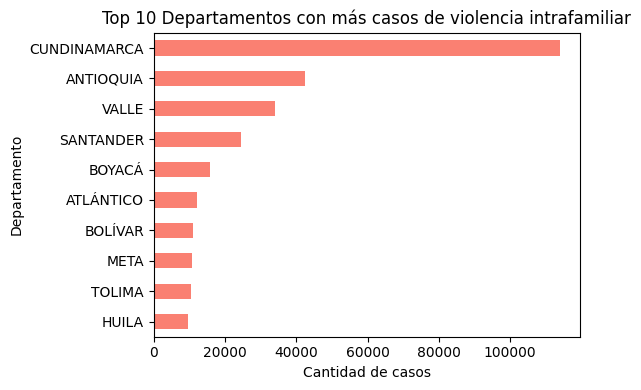

In [ ]:
# Gráfico de barras horizontales
# Agrupar por departamento y sumar la cantidad de casos
casos_departamento = df.groupby('DEPARTAMENTO')['CANTIDAD'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(6, 4))
casos_departamento.plot(kind='barh', color='salmon')
plt.title("Top 10 Departamentos con más casos de violencia intrafamiliar")
plt.xlabel("Cantidad de casos")
plt.ylabel("Departamento")
plt.gca().invert_yaxis()  # Opcional: muestra el más alto arriba
plt.tight_layout()
plt.show()

El gráfico muestra que Cundinamarca, Antioquia y Valle del Cauca son los departamentos con más casos reportados de violencia intrafamiliar. Esta concentración sugiere que las áreas con mayor densidad poblacional y urbanización tienden a registrar más incidentes, lo que puede estar relacionado tanto con factores sociales como con una mayor capacidad de reporte y registro en estas regiones.

### Gráfico de torta por género

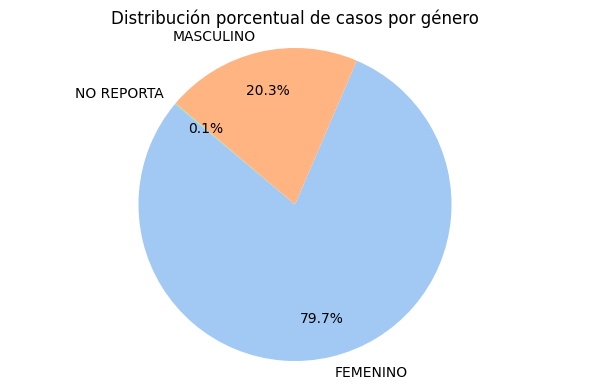

In [ ]:
# Pie chart por género
genero_counts = df.groupby('GENERO')['CANTIDAD'].sum()

plt.figure(figsize=(6, 4))
plt.pie(
    genero_counts,
    labels=genero_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel"),
    labeldistance=1.1,     # Aleja las etiquetas del centro
    pctdistance=0.75       # Posición de los porcentajes
)
plt.title("Distribución porcentual de casos por género")
plt.axis('equal')  # Mantiene la forma circular
plt.tight_layout()
plt.show()


La mayoría de los casos de violencia intrafamiliar reportados corresponde a víctimas de género femenino, representando aproximadamente el 80% del total. Esto evidencia una fuerte desigualdad de género en la ocurrencia de estos hechos.

### Distribución de casos de violencia intrafamiliar por grupo etario

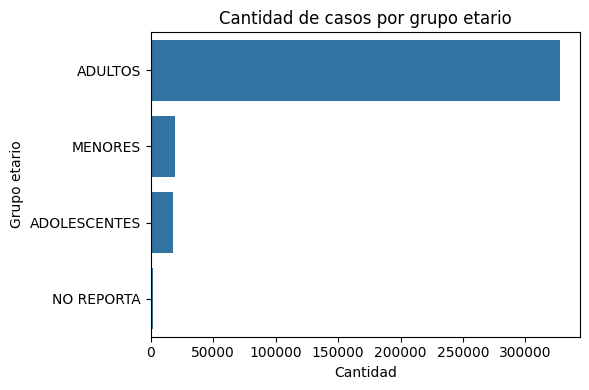

In [ ]:
# Cantidad por grupo etario
casos_por_grupo = df.groupby('GRUPO ETARIO')['CANTIDAD'].sum().reset_index().sort_values(by='CANTIDAD', ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x='CANTIDAD', y='GRUPO ETARIO', data=casos_por_grupo)
plt.title("Cantidad de casos por grupo etario")
plt.xlabel("Cantidad")
plt.ylabel("Grupo etario")
plt.tight_layout()
plt.show()

Los adultos son el grupo más afectado, lo que indica que la violencia intrafamiliar impacta con mayor fuerza a personas en edad productiva.

### Evolución mensual de casos de violencia intrafamiliar

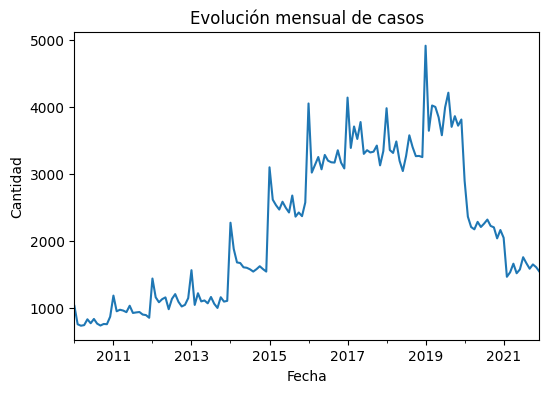

In [ ]:
# Casos por mes
casos_mensuales = df.groupby(df['FECHA HECHO'].dt.to_period('M'))['CANTIDAD'].sum()
casos_mensuales.plot(kind='line', figsize=(6,4))
plt.title("Evolución mensual de casos")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.show()

La evolución mensual de los casos muestra una tendencia general al alza, especialmente desde 2015. Se evidencian picos recurrentes a comienzos de cada año, lo que sugiere una posible relación con eventos sociales. Desde 2020 se nota una disminución, posiblemente asociada a cambios en las dinámicas de reporte o contexto social.

###Cantidad de casos por tipo de arma o medio, según género

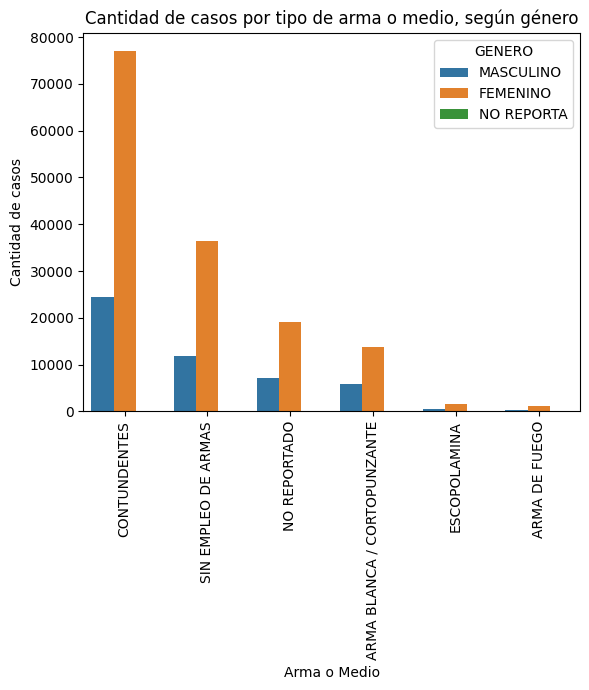

In [ ]:
plt.figure(figsize=(6, 7))
sns.countplot(
    data=df,
    x='ARMAS MEDIOS',
    hue='GENERO',
    order=df['ARMAS MEDIOS'].value_counts().index  # ordena por frecuencia
)
plt.title("Cantidad de casos por tipo de arma o medio, según género")
plt.xlabel("Arma o Medio")
plt.ylabel("Cantidad de casos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Los casos de violencia intrafamiliar se cometen principalmente con elementos contundentes y, en segundo lugar, sin el uso de armas. En ambos escenarios, las mujeres son las principales víctimas, lo que refleja un patrón de violencia física en contextos domésticos. Este tipo de agresión sugiere una proximidad entre víctima y agresor, posiblemente ligada a dinámicas de control y violencia estructural de género.

### Correlación entre variables numéricas

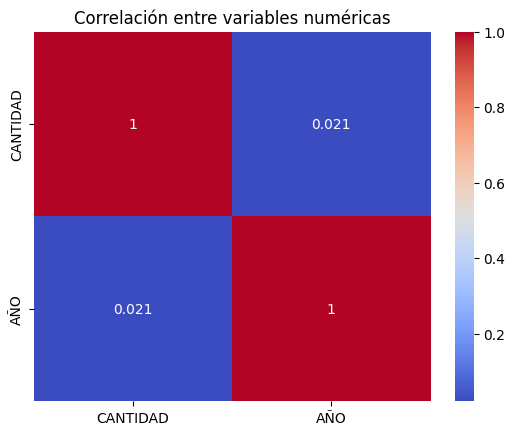

In [ ]:
# Mapa de calor de correlación
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables numéricas")
plt.show()

No se observa una correlación fuerte entre las variables numéricas del dataset. Esto indica que su relación es débil o nula, por lo que cada variable aporta información diferente.

# Patrones y Relaciones
* La mayoría de víctimas son mujeres, especialmente en la edad adulta.
* Cundinamarca, Antioquia y Valle del Cauca concentran el mayor número de casos
* Se observan picos de violencia al inicio de varios años, posiblemente asociados a factores sociales o económicos.
* La mayoría de casos se reportan sin uso de armas o con objetos contundentes, afectando más a mujeres.
* Hay datos no reportados que afectan el análisis y evidencian la necesidad de mejorar el registro.

# Conclusiones
* El análisis revela que la violencia intrafamiliar sigue patrones claros de género, edad, lugar y tiempo.
* Las mujeres jóvenes en zonas urbanas son las más vulnerables.
* Es clave mejorar la calidad del dato para obtener diagnósticos más precisos.
